In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.11'

In [4]:

df=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx', sheet_name='Changing_spectral_center')

Text(0, 0.5, 'Spectral center (cm$^{-1}$)')

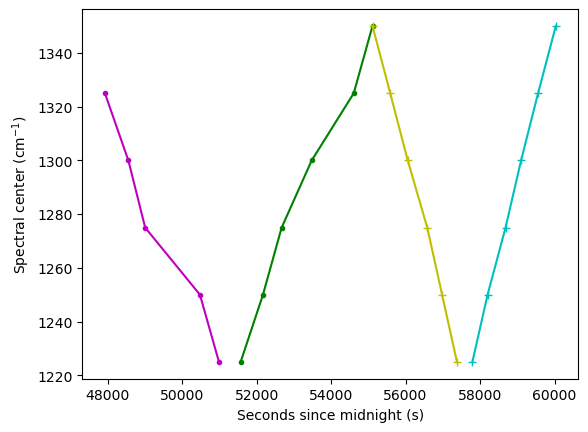

In [5]:
#plt.plot(df['sec since midnight'], df['Spectral Center'], '*r')
down1=df['sec since midnight_x'].between(47000, 51000)
up1=df['sec since midnight_x'].between(51100, 55500)
down2=df['sec since midnight_x'].between(54700, 57700)
up2=df['sec since midnight_x'].between(54700, 57700)
up2=df['sec since midnight_x'].between(57770, 62000)
plt.plot(df['sec since midnight_x'].loc[up1], df['Spectral Center_x'].loc[up1], '.-g')
plt.plot(df['sec since midnight_x'].loc[down1], df['Spectral Center_x'].loc[down1], '.-m')
plt.plot(df['sec since midnight_x'].loc[down2], df['Spectral Center_x'].loc[down2], '+-y')
plt.plot(df['sec since midnight_x'].loc[up2], df['Spectral Center_x'].loc[up2], '-+c')

plt.xlabel('Seconds since midnight (s)')
plt.ylabel('Spectral center (cm$^{-1}$)')

In [6]:
ylims=np.array([104.05, 104.3])
lower_rho=pf.calculate_density_ucb(Ne_line_combo='1117_1447',  corrected_split=ylims[0], split_err=0)
upper_rho=pf.calculate_density_ucb(Ne_line_combo='1117_1447',  corrected_split=ylims[1], split_err=0)

## Lets calculate an average error

In [7]:
Av_Splitting=np.nanmean(df['Splitting'])
Av_Split_err=np.nanmean(df['Split_σ'])
pref_Ne=0.9976
Av_Corr_Split=Av_Splitting*pref_Ne

pref_Ne=np.nanmean(df['Ne_Corr'])
Ne_err=np.nanmean(df['1σ_Ne_Corr'])

av_err_corr_split=Av_Corr_Split*((Av_Split_err/Av_Splitting)**2+
(Ne_err/pref_Ne)**2)**0.5

av_err_corr_split

0.004805345387719462

In [8]:
df['Splitting'].loc[np.round(df['Spectral Center_x'])==1225]

0    104.159656
1    104.181062
2    104.163918
3    104.165864
Name: Splitting, dtype: float64

In [10]:
## Averages
Av_Split_change=np.nanmean(df['Splitting'].loc[np.round(df['Spectral Center_x'])==1225])-np.nanmean(df['Splitting'].loc[np.round(df['Spectral Center_x'])==1350])
Av_Split_change

-0.219563897340052

In [11]:
## Averages
Av_cSplit_change=np.nanmean(df['Corrected_Splitting'].loc[np.round(df['Spectral Center_x'])==1225])-np.nanmean(df['Corrected_Splitting'].loc[np.round(df['Spectral Center_x'])==1350])
Av_cSplit_change

-0.14511174152190165

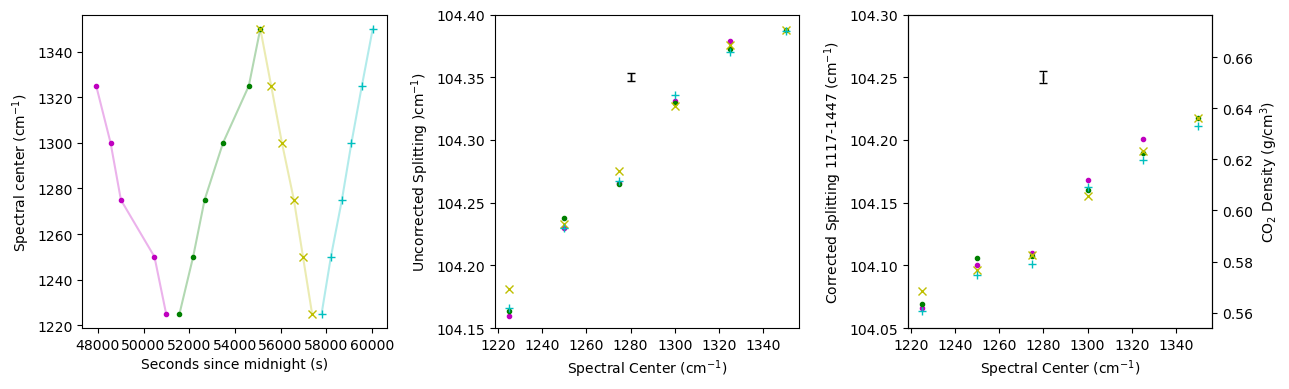

In [13]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(13,4))

a=0.3
ax0.plot(df['sec since midnight_x'].loc[up1], df['Spectral Center_x'].loc[up1], '-g', alpha=a)
ax0.plot(df['sec since midnight_x'].loc[down1], df['Spectral Center_x'].loc[down1], '-m', alpha=a)
ax0.plot(df['sec since midnight_x'].loc[down2], df['Spectral Center_x'].loc[down2], '-y', alpha=a)
ax0.plot(df['sec since midnight_x'].loc[up2], df['Spectral Center_x'].loc[up2], '-c', alpha=a)
ax0.plot(df['sec since midnight_x'].loc[up1], df['Spectral Center_x'].loc[up1], '.g')
ax0.plot(df['sec since midnight_x'].loc[down1], df['Spectral Center_x'].loc[down1], '.m')
ax0.plot(df['sec since midnight_x'].loc[down2], df['Spectral Center_x'].loc[down2], 'xy')
ax0.plot(df['sec since midnight_x'].loc[up2], df['Spectral Center_x'].loc[up2], '+c')

ax0.set_xlabel('Seconds since midnight (s)')
ax0.set_ylabel('Spectral center (cm$^{-1}$)')


ax1.plot(df['Spectral Center_x'].loc[down1], df['Splitting'].loc[down1],  '.m')

ax1.errorbar(1280, 104.35, 
xerr=0, yerr=Av_Split_err,
             fmt='d', ecolor='black', elinewidth=0.75, mfc='cyan', ms=0, mec='k', capsize=3)



ax1.plot(df['Spectral Center_x'].loc[up1], df['Splitting'].loc[up1],  '.g')
ax1.plot(df['Spectral Center_x'].loc[down2], df['Splitting'].loc[down2],  'xy')
ax1.plot(df['Spectral Center_x'].loc[up2], df['Splitting'].loc[up2],  '+c')
ax1.set_xlabel('Spectral Center (cm$^{-1}$)')
ax1.set_ylabel('Uncorrected Splitting (cm$^{-1}$)')

ax1.set_xlabel('Spectral Center (cm$^{-1}$)')
ax1.set_ylabel('Uncorrected Splitting )cm$^{-1}$)')
ax1.set_ylim(ylims+0.1)
ax2.plot(df['Spectral Center_x'].loc[down1], df['Corrected_Splitting'].loc[down1],  '.m')
ax2.plot(df['Spectral Center_x'].loc[up1], df['Corrected_Splitting'].loc[up1],  '.g')
ax2.errorbar(1280, 104.25, 
xerr=0, yerr=av_err_corr_split,
             fmt='None', ecolor='black', elinewidth=0.75, mfc='cyan', ms=0, mec='k', capsize=3)


ax2.plot(df['Spectral Center_x'].loc[down2], df['Corrected_Splitting'].loc[down2],  'xy')
ax2.plot(df['Spectral Center_x'].loc[up2], df['Corrected_Splitting'].loc[up2],  '+c')
ax2.set_xlabel('Spectral Center (cm$^{-1}$)')
ax2.set_ylabel('Corrected Splitting 1117-1447 (cm$^{-1}$)')
ax2.yaxis.set_tick_params(which='both', labelbottom=True)
ax2.set_ylim(ylims)

# Twin the x axis. 
ax3 = ax2.twinx()
ax3.set_ylabel('CO$_2$ Density (g/cm$^3$)')
ax3.set_ylim([lower_rho['Density g/cm3'].iloc[0], upper_rho['Density g/cm3'].iloc[0]])



fig.tight_layout()